# Ex2
## Noam Kesten - 208289751
## Roy Kreiner  -   205731664

## Modules

In [111]:
import pandas 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import seaborn as sns
import numpy as np
import re
from itertools import islice

## Utils

In [37]:
url = "https://thinkil.co.il/texts-sitemap.xml"
url_response = requests.get(url)
soup = BeautifulSoup(url_response.text, 'html.parser')

## Question 1

In [38]:
urls_text = [link.get_text() for link in soup.find_all("loc")][1:]

In [94]:
df_dict = {"url": [], "author": [], "title": [], "text": []}

In [95]:
for url in urls_text:
    time.sleep(1)
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    
    df_dict["url"].append(url)
    df_dict["author"].append(",".join([a.text for a in soup.find_all("span", "author-name")]))
    df_dict["title"].append(soup.find("h1", "page-title").text.strip())
    df_dict["text"].append(soup.find("article").text)
    
df = pd.DataFrame(df_dict, columns=['url', 'author', 'title', 'text'])
    

    

In [97]:
df.to_csv("nlp_hebrew_ex2.tsv", sep='\t', encoding='utf-8-sig')

## Question 2


### Question 2.a

In [98]:
def split_by_whitespaces(text): 
    return text.split()

### Question 2.b

In [370]:
def plot_histogram_count_words(texts):
    split_by_whitespaces(texts.str).map(lambda x: len(x)).hist()


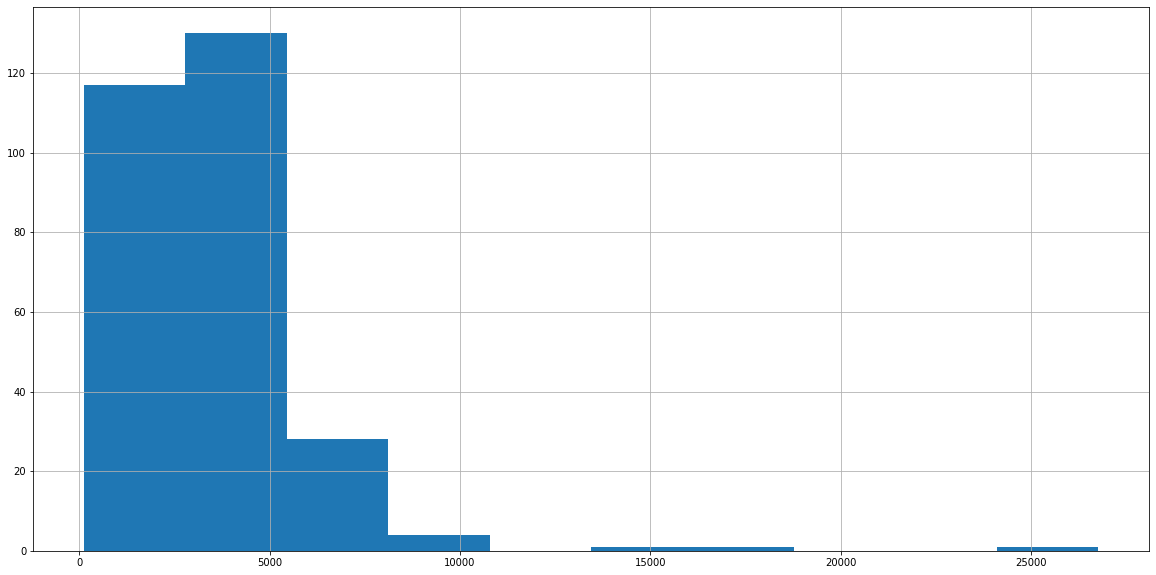

In [371]:
plot_histogram_count_words(df["text"])

### Question 2.c

In [302]:
    

def find_and_plot_top_20_common_words(texts):
    frequencies = {}
    # count
    for text in texts:
        for splitted_text in split_by_whitespaces(text):
            frequencies[splitted_text] = frequencies.get(splitted_text, 0) + 1

    # sort
    top_20 = sorted(frequencies.items(), key=lambda x:x[1], reverse=True)[:20] 
    
    # plot
    tokens, freqs = zip(*top_20)
    tokens = [token[::-1] for token in tokens]
#     plt.rcParams["figure.figsize"] = (20, 10)
    plt.bar(tokens, freqs)

    

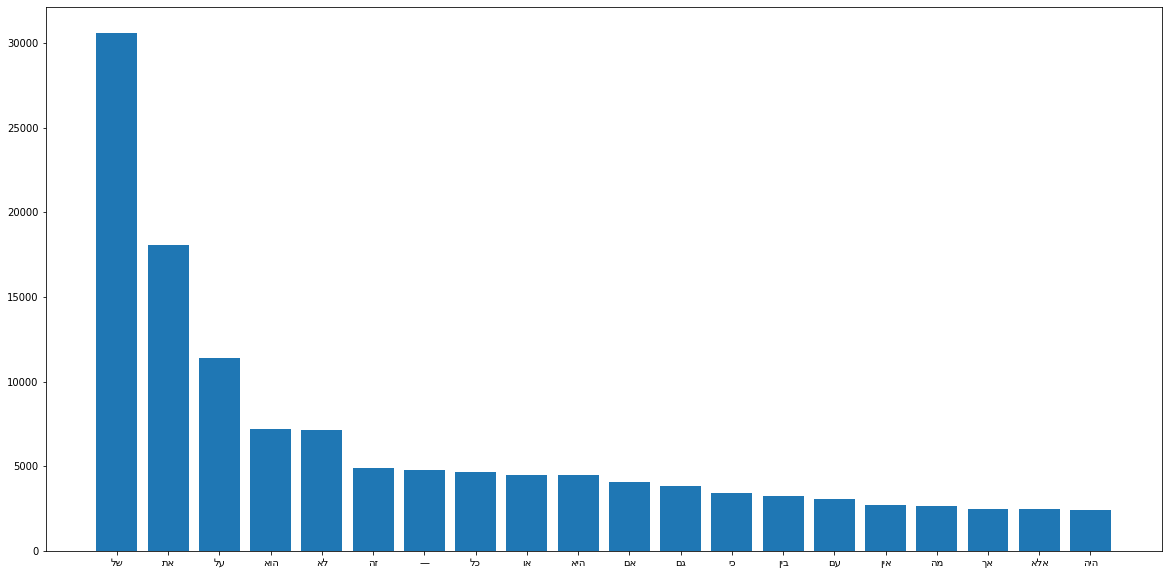

In [303]:
find_and_plot_top_20_common_words(df["text"])

### Question 2.d

In [354]:
from nltk import ngrams

def find_and_plot_top_20_bigrams(texts):
    
    counter = Counter()
    for text in texts:
        bigrams = ngrams(text.split(), 2)
        counter += Counter(bigrams)
        
    top_20 = counter.most_common()[:20]
    
    freqs = []
    tokens = []
    
    for token, freq in top_20:
        tokens.append(token[0] + " " + token[1])
        freqs.append(freq)
    
    tokens = [token[::-1] for token in tokens]
    sns.barplot(x=tokens, y=freqs)
    
    

                            
        
    

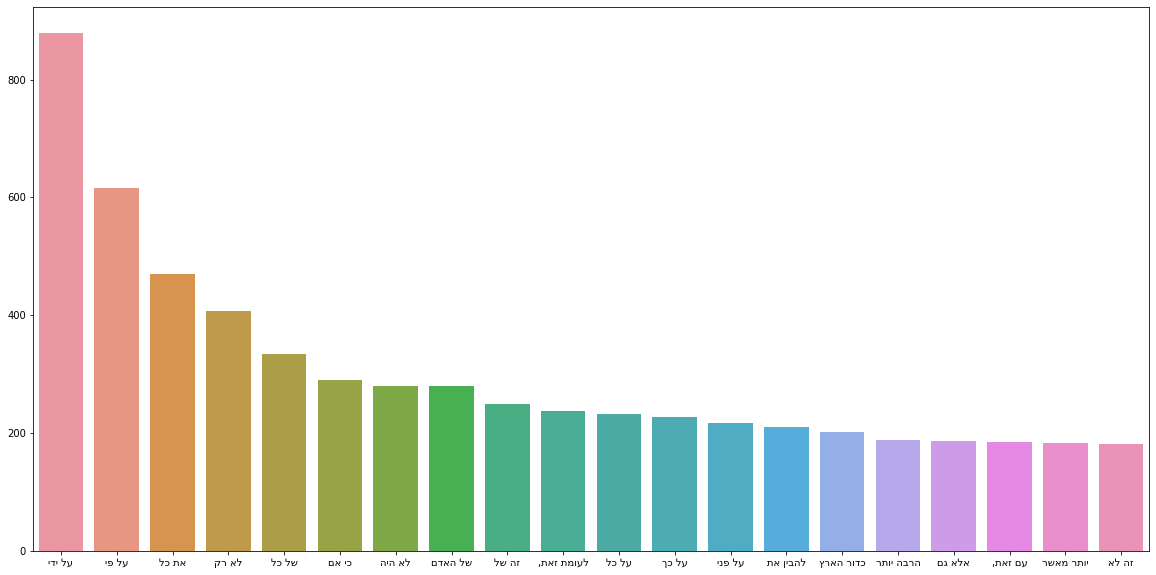

In [275]:
find_and_plot_top_20_bigrams(df["text"])

### Question 2.e

In [326]:
def get_hebrew_stopwords():
    with open("heb_stopwords.txt", encoding="utf-8-sig") as f:
        stop_words = {l.strip() for l in f.readlines()}
    return stop_words

In [327]:
stopwords = get_hebrew_stopwords();

In [337]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word not in stopwords:
            new_text.append(word)
    return new_text

In [360]:
def find_and_plot_20_most_common_words_no_stopwords(texts):

    new_texts = pd.DataFrame()
    for text in texts:
        df2 = pd.DataFrame(remove_stopwords(text))
        new_texts = pd.concat([new_texts,df2], ignore_index=True)
    find_and_plot_top_20_common_words(new_texts[0])
    


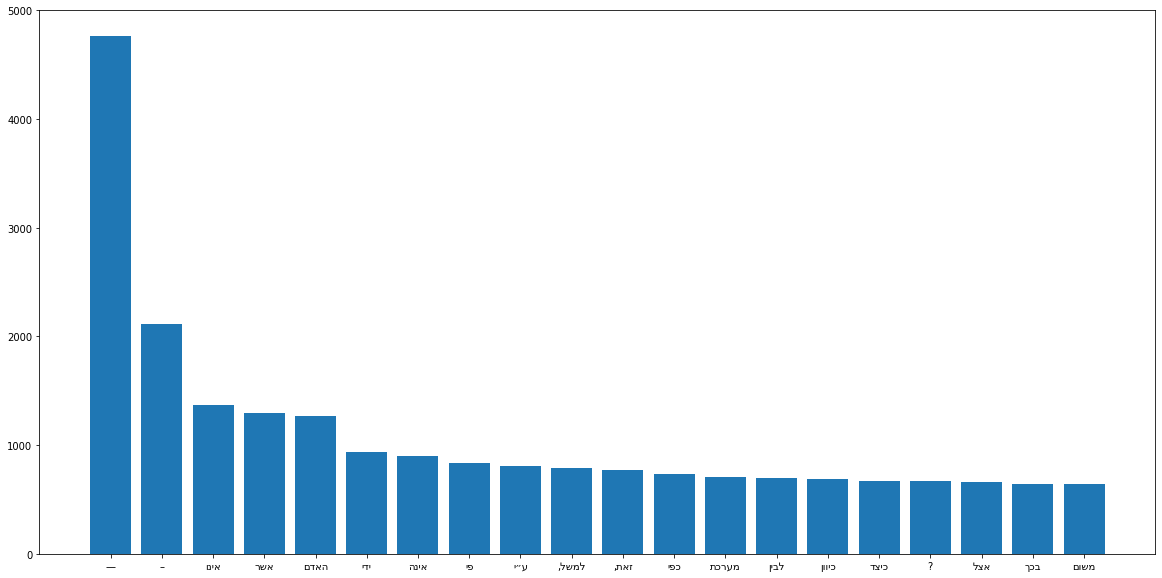

In [361]:
find_and_plot_20_most_common_words_no_stopwords(df["text"])

### Question 2.f

In [364]:
def find_and_plot_20_most_common_bigrams_no_stopwords(texts):
    new_texts = []
    counter = Counter()
    for text in texts:
        text = remove_stopwords(text)
        bigrams = ngrams(text, 2)
        counter += Counter(bigrams)
        
    top_20 = counter.most_common()[:20]
    
    freqs = []
    tokens = []
    
    for token, freq in top_20:
        tokens.append(token[0] + " " + token[1])
        freqs.append(freq)
    
    tokens = [token[::-1] for token in tokens]
    sns.barplot(x=freqs, y=tokens)
    

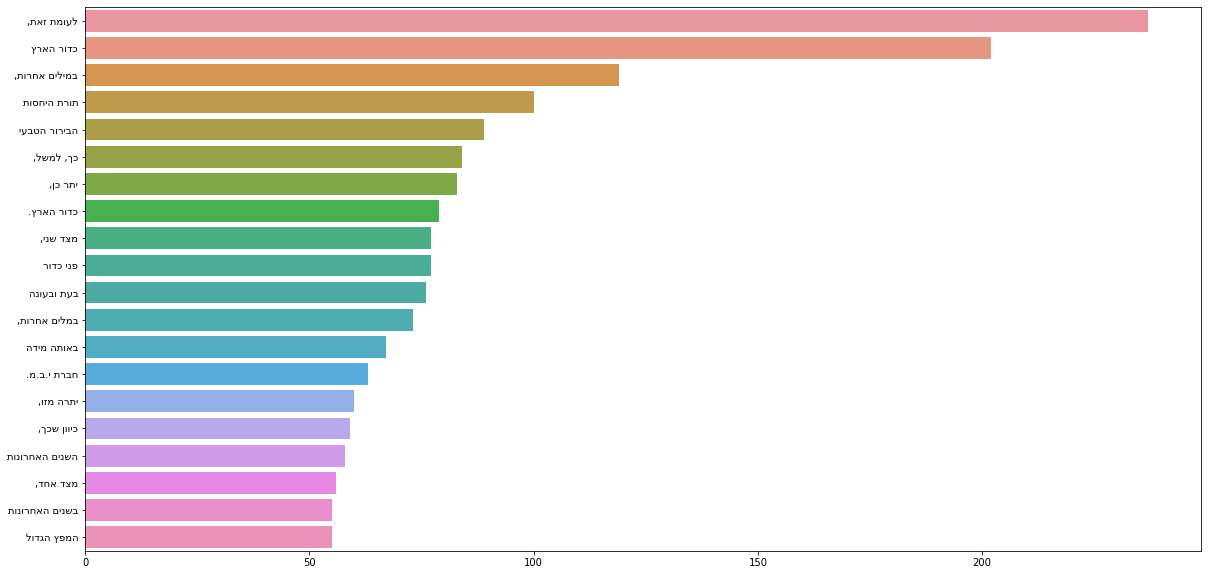

In [365]:
find_and_plot_20_most_common_bigrams_no_stopwords(df["text"])

# Analysis
### Question 1:
נוכל לומר על אופי האתר בהתאם למילים וצירופי המילים השכיחים ביותר כי האתר
מכיל מאמרים רבים הקשורים לתחומים כגון - היסטוריה, מדע, ופילוסופיה.
צירופי מילים (ביגרם) המתאימים לתחום מדע הינם: כדור הארץ,תורת היחסות,  המפץ הגדול, פני כדור, חוקי הטבע, תורת הקוונטום וכדומה.
צירופי מילים (ביגרם) המתאימים לתחום היסטוריה הינם:
השנים האחרונות, המאה 91, הבירור הטבעי.
צירופי מילים (ביגרם) המתאימים לתחום פילוסופיה הינם:
טבע האדם, האי ודאות.
אציין כי יתכן שצירופי המילים המצויינים יכולים להתאים לתחומים שונים מאלו שצויינו.
ניתן לשים לב כי ללא הסרה של מילות עצירה מתוצאות ההיסטוגרמה, נקבל קובץ מילים גנרי
שיתכן כי יתאים לכל סוג של אתר.


### Question 2:
בעיות  שקשורות לעברית שזיהינו מתוך הסטטיסטיקה הן:
- בעת ניתוח סטטיטקה על צירופי מילים אשר לא צריכות לכלול מילות עצירה,
קיימים צירופי מילים המכילים בתוכם מילות עצירה כתוצאה מ"שייכות", ניתן לראות זאת עבור
המילה "כיוון שכך" שמופיעה בצירופי השייכות השכיחים ביותר אך המילה כך הינה מילת עצירה
אשר מופיעה בצירוף המילים כיוון שנוספה אליה האות "ש" אשר מקומה באופן כתיבת השפה העברית כחלק מ"שייכות" בשפה
מקרה דומה הוא צירוף המילים "יתרה מזו" אשר מופיעה בצירופים הנפוצים.
נשים לב שבאנגלית תופעה זה בלתי אפשרית כיוון שבמקרים אלו האות "ש" והאות "ו" יתורגמו למילים שלמות
"That", "And".
- יתכן כי צירופי מילים נספרים מספר לא תקין של פעמים כתוצאה מהוספה של "ה" הידיעה לצירוף,
דוגמה לכך היא הצירוף "האי ודאות" שבמידה וקיים ללא "ה" הידיעה באופן הבא - "אי ודאות" יכלל
בספירת הצירופים כצירוף שונה.
- ניתן לראות צירופים של מילים ומספרים שהסדר שלהם הינו הפוך ביחס לצורת הכתיבה המקורית.

### Question 3:
קיימות בעיות נקיון שאינן קשורות לעברית כגון:
- קיימים "," מחוברים ישירות לסוף של מילים (ללא רווח) ובכך מתייחסים למילה אמיתית הכוללת "," בסופה למילה חדשה
- קיימים סימני דפוס לא שלא מנוקים כגון "?", "-" וכדומה אשר מופיעים בתור מילים שכיחות.
- התווים הבאים: "--" , "-" ,מופיעים בגרף המילים השכיחות ביותר, מה שאינו תקין עבור מילים.